In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv("Data_for_UCI_named.csv")
X = df.drop(columns=["stab", "stabf"])
y = df["stabf"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Reshape for GRU (samples, time steps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# Define GRU model
model = keras.Sequential([
    layers.GRU(128, activation="tanh", recurrent_activation="sigmoid", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.GRU(64, activation="tanh", recurrent_activation="sigmoid"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.003), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8094 - loss: 0.4022 - val_accuracy: 0.9125 - val_loss: 0.2085
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9131 - loss: 0.2108 - val_accuracy: 0.9365 - val_loss: 0.1529
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9351 - loss: 0.1638 - val_accuracy: 0.9490 - val_loss: 0.1342
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9419 - loss: 0.1434 - val_accuracy: 0.9570 - val_loss: 0.1007
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9495 - loss: 0.1183 - val_accuracy: 0.9470 - val_loss: 0.1179
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9535 - loss: 0.1106 - val_accuracy: 0.9640 - val_loss: 0.0960
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9532 - loss: 0.1083 - val_accuracy: 0.9675 - val_loss: 0.0840
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9590 - loss: 0.0971 - val_accuracy: 

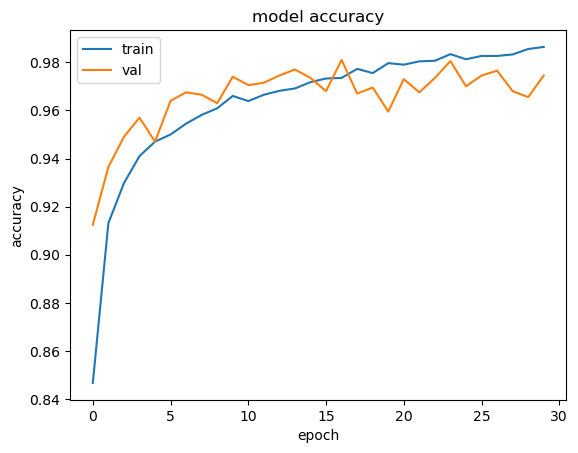

In [2]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

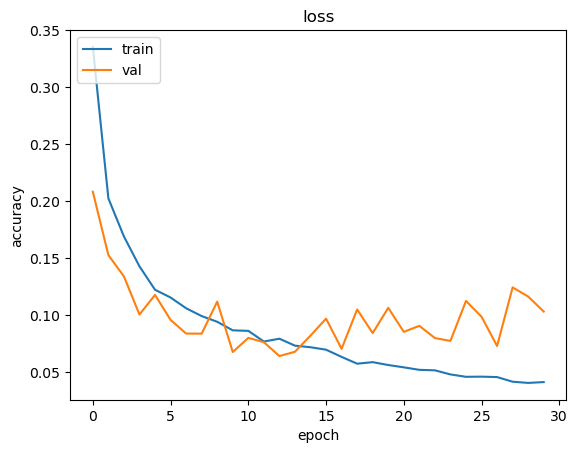

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


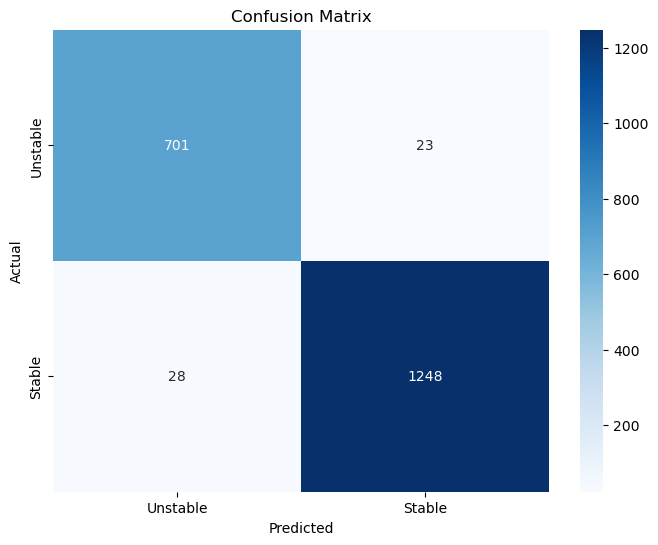

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       724
           1       0.98      0.98      0.98      1276

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [4]:
#confusion matrix plotting and classification report
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unstable', 'Stable'], yticklabels=['Unstable', 'Stable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


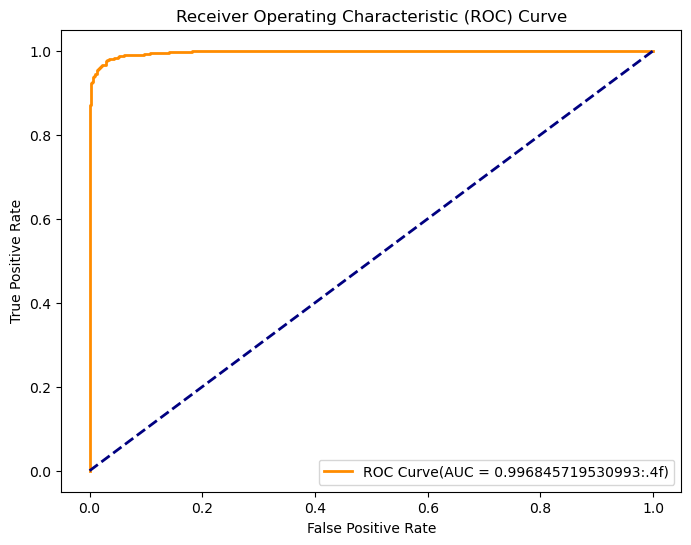

AUC Score: 0.9968


In [5]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve(AUC = {roc_auc}:.4f)')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print(f"AUC Score: {roc_auc:.4f}")